# Удержание сотрудников
Это мой учебный проект, в котором я пыталась решить проблему оттока сотрудников из компании с помощью машинного обучения. Я создала модели, которые могут предсказывать отток сотрудников, а также проанализировала основные причины их оттока. Также я проанализировала отток сотрудников у каждого отдела и оказалось, что между причинами оттока в разных отделах есть разница. 

In [95]:
# подгружаем все основные пакеты
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot') # для красивых графиков

In [96]:
# загружаем файл
file = 'WA_Fn-UseC_-HR-Employee-Attrition.csv'
data = pd.read_csv(file)
# посмотрим чо там творится
pd.options.display.max_columns = 100
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [98]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [99]:
data.shape

(1470, 35)

# Переменные:
##### Прежде чем что-то делать, нужно понять, что вообще здесь у них происходит. Для этого нужно понять, какая переменная что значит.
   - Age (непрерывная переменная) - возраст работника. Минимальный возраст - 18 лет, максимальный - 60 лет;
   - Attrition (категориальная) - отток (ушёл человек с работы или остался)."Yes" - ушёл, "No" - остался;
   - BussinessTravel (категориальная) - отображает, как часто человек ездил в командировки. "Non-Travel" - никогда не ездил, "Travel_Frequently" - часто ездил, "Travel_Rarely" - редко ездил;
   - DailyRate (непрерывная) - Дневная ставка (сколько денег зарабатывал сотрудник каждый день). Минимальная зарплата была 102 у.е в день, максимальная 1499 у.е в день;
   - Department (категориальная) - отдел, в котором работает человек. Всего их три: "Sales" - отдел продаж, "Human Resources" - отдел кадров, "Research & Development" - отдел исследований и разработок;
  - DistanceFromHome (непрерывная) - расстояние, которое каждое утро и каждый вечер бедный человек в час пик (либо в жутких пробках) едет на работу/с работы :(( . Минимальное расстояние - 1 километр(?), максимальное - 29 километров (ужас какой);
   - Education (категориальная)	- образование. Измеряется от 1 до 5. Я предполагаю, что: 1 - без образования, 2 - среднее образование, 3 - среднее специальное образование, 4 - неполное высшее образование, 5 - высшее образование))
   - EducationField (категориальная) - специальность. Их здесь выделено 5: Marketing - маркетолог, Technical Degree -технарь Medical - медик, Life Sciences - специалист по естественным наукам, Human Resources - специалист по кадрам. Ещё есть шестое значение "Other" для всех остальных специальностей, которые видимо не особо важны;

X   - EmployeeCount (непрерывная) - Не знаю, что это. Как мы видим, у всех цифра 1, значит можно вообще наверное убрать эту колонку, толку от нее не будет;

  - EmployeeNumber (непрерывная) - видим, что в этой колонке все значения переменных уникальные. в связи с этим, предполагаю, что это индивидуальный номер сотрудника;
  - EnvironmentSatisfaction (категориальная) - степень удовлетворённости атмосферой, которая царит на рабочем месте (??), измеряется по шкале от 1 - наверное совсем не доволен, 4 - полностью удовлетворяет (лишь мои догадки);
  
  - Gender (категориальная) - женщина или мужчина;
   - HourlyRate (непрерывная) - почасовая ставка. Минимальная - 30 у.е, максимальная 100 у.е;

   - JobInvolvement (категориальная) - насколько человек вовлечён в рабочий процесс (??). Измеряется по шкале от 1 до 4.
   - JobLevel (категориальная) - Уровень работы (??). Может быть это степень престижности той или иной работы?? не понимаю. Изменряется по шкале от 1 до 5;
   - JobRole (категориальная) - должностность. Тут их существует всего девять: 'Sales Representative' - торговый представитель , 'Manufacturing Director' - начальник производства, 'Research Director' - научный директор, 'Sales Executive' - исполнительный директор по продажам, 'Laboratory Technician' - рабочий лаборатории, 'Research Scientist' - научный сотрудник, 'Manager' - менеждер, 'Human Resources' - кадровик, 'Healthcare Representative' - представитель здравоохранения;
   - JobSatisfaction (категориальная) - удовлетворённость работой, удовлетворение от труда (какая может быть удовлетворённость работой.......). Измеряется по шкале от 1 до 4;
   - MaritalStatus (категориальная) - семейное положение. 'Married' - женат/замужем, 'Divorced' - разведён, 'Single' - никогда не был женат/замужем;
   - MonthlyIncome (непрерывная) - ежемесечный доход. Минимальный - 1009 у.е, максимальный - 19999 у.е;
  - MonthlyRate (непрерывная) - ежемесечная ставка зарплаты. Минимальная - 2094 у.е, максимальная - 26999 у.е;
  
  - NumCompaniesWorked (непрерывная) - может быть количество компаний, в которых человек работал до этого (??). Минимальное - 0, максимальное - 9;
   
X   - Over18 (категориальная) - не знаю что это. У всех в этой колонке стоит буква Y, значит смысла в ней нет. Удалю её;
   - Overtime (категориальная) - может быть это отображает, перерабатывает ли человек свою норму часов (?). Здесь либо 'Yes', либо 'No';
   - PercentSalaryHike (непрерывная) - процентное повышение зарплаты. Минимальное значение - 11, максимальное - 25;

- PerformanceRating (категориальная) - оценка эффективности работника. Тут их всего две: либо 3 либо 4;   - RelationshipSatisfaction (категориальная) - удовлетворённость взаимоотношениями с коллегами. Измеряется также по шкале от 1 до 4;

X   - StandardHours - наверное, сколько часов в месяц должен по стандарту отработь сотрудник. У всех этот показатель одинаковый, поэтому можно тоже удалить эту колонку;
   - StockOptionLevel (категориальная) - переводится как-то типа "уровень опционов на акции"...Измеряется по шкале от 0 до 3.
   - TotalWorkingYears (непрерывная) - стаж работы. Минимальный стаж - 0 лет, максимальный - 40 лет;
   - TrainingTimesLastYear (непрерывная) - сколько раз работник проходил тренинг(обучение, повышение квалификации, че там ещё это может значить?) в прошлом году(??) минимальное количество раз - 0, максимальное - 6;
 - WorkLifeBalance (категориальная) - насколько хорошо сбалансировано количество рабочих часов и других активностей в жизни человека. Измеряется по шкале от 1 до 4;

  - YearsAtCompany	(непрерывная) - сколько лет человек работает в компании. Минимальное количество - 0 лет, максимальное - 40 лет;
  - YearsInCurrentRole (непрерывная) - сколько лет человек работает на одной должности. Минимальное количество - 0 лет, максимальное -18 лет;
   - YearsSinceLastPromotion (непрерывная) - сколько лет прошло с последнего чего-то... (??)
   - YearsWithCurrManager (непрерывная) - сколько лет человек работает с одним и тем же менеджером (???)

In [100]:
# удалю все ненужные колонки, которые хотела
pd.options.display.max_columns = 100
print(data.columns.tolist())
data = data.drop('EmployeeCount', 1)
data = data.drop('Over18', 1)
data = data.drop('StandardHours', 1)

['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [101]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

Круто, пропусков нет. 
Целевой переменной, которую мы хотим научится предсказывать, здесь будет являтся переменная "Attrition", которая содержит в себе информацию о том, ушёл ли работник.

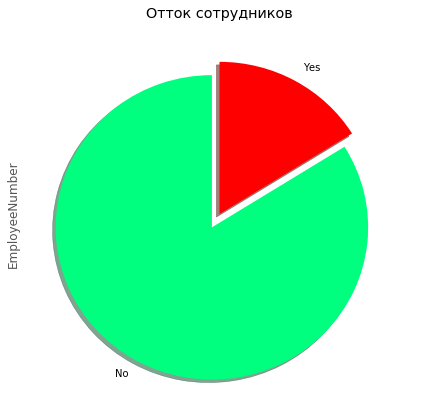

In [102]:
attrition = data.groupby(['Attrition'])['EmployeeNumber'].count()
attrition.plot(kind='pie', figsize=(7,7), colors= ['springgreen', 'r'], shadow = 1, startangle = 90, explode = (0.1, 0))
plt.title('Отток сотрудников')
plt.show()

Видно, что большинство работников всё таки не ещё не ушли (пока что!), так что не всё потеряно. Но нужно предпринять меры, чтобы другие сотрудники не начали покидать, для этого мы попытаемся создать модель, которая будет наиболее точно предсказывать, какие люди могут покинуть компанию в ближайшее время.
#### 1. Формулировка бизнес-задачи:
Предотвращение оттока работников с помощю предсказания, уйдёт ли тот или иной работник в ближайшее время. После выявления основных причин ухода работников, составить рекомендации по удержанию сотрудников, и, на основе этих данных, в дальнейшем, предоставлять что-то хорошее работникам, которые вероятно могут уйти в ближайшее время. 
#### 2. Перевод задачи на язык программирования:
   - Выявление корреляции переменной Attrition со всеми остальными переменными
   - Создание модели, способной как можно более точно предсказывать, уйдёт ли человек в ближайшее время. Обучаться она будет на данных о переменных, которые имеют наибольшее влияние на отток;
   - Оценка модели с помощью метрик классификации;
   - Анализ полученных с помощью машинного обучения данных и составление рекомендаций по удержанию сотрудников;

## Корреляция признаков с целевой переменной
Посмотрим, сущестуют ли здесь какие-либо интересные зависимости, а также как целевая переменная зависит от остальных признаков.

In [103]:
# делаю кодировку, чтобы избавится от нечисловых значений

from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(data.Age)
data['Age'] = e.transform(data.Age)

e = LabelEncoder()
e.fit(data.Attrition)
data['Attrition'] = e.transform(data.Attrition)

e = LabelEncoder()
e.fit(data.BusinessTravel)
data['BusinessTravel'] = e.transform(data.BusinessTravel)

e = LabelEncoder()
e.fit(data.DailyRate)
data['DailyRate'] = e.transform(data.DailyRate)

e = LabelEncoder()
e.fit(data.Department)
data['Department'] = e.transform(data.Department)

e = LabelEncoder()
e.fit(data.DistanceFromHome)
data['DistanceFromHome'] = e.transform(data.DistanceFromHome)

e = LabelEncoder()
e.fit(data.Education)
data['Education'] = e.transform(data.Education)

e = LabelEncoder()
e.fit(data.EmployeeNumber)
data['EmployeeNumber'] = e.transform(data.EmployeeNumber)

e = LabelEncoder()
e.fit(data.EnvironmentSatisfaction)
data['EnvironmentSatisfaction'] = e.transform(data.EnvironmentSatisfaction)

e = LabelEncoder()
e.fit(data.Gender)
data['Gender'] = e.transform(data.Gender)

e = LabelEncoder()
e.fit(data.HourlyRate)
data['HourlyRate'] = e.transform(data.HourlyRate)

e = LabelEncoder()
e.fit(data.JobInvolvement)
data['JobInvolvement'] = e.transform(data.JobInvolvement)

e = LabelEncoder()
e.fit(data.JobLevel)
data['JobLevel'] = e.transform(data.JobLevel)

e = LabelEncoder()
e.fit(data.JobRole)
data['JobRole'] = e.transform(data.JobRole)

e = LabelEncoder()
e.fit(data.JobSatisfaction)
data['JobSatisfaction'] = e.transform(data.JobSatisfaction)

e = LabelEncoder()
e.fit(data.MaritalStatus)
data['MaritalStatus'] = e.transform(data.MaritalStatus)

e = LabelEncoder()
e.fit(data.MonthlyIncome)
data['MonthlyIncome'] = e.transform(data.MonthlyIncome)

e = LabelEncoder()
e.fit(data.NumCompaniesWorked)
data['NumCompaniesWorked'] = e.transform(data.NumCompaniesWorked)

e = LabelEncoder()
e.fit(data.OverTime)
data['OverTime'] = e.transform(data.OverTime)

e = LabelEncoder()
e.fit(data.PercentSalaryHike)
data['PercentSalaryHike'] = e.transform(data.PercentSalaryHike)

e = LabelEncoder()
e.fit(data.RelationshipSatisfaction)
data['RelationshipSatisfaction'] = e.transform(data.RelationshipSatisfaction)

e = LabelEncoder()
e.fit(data.StockOptionLevel)
data['StockOptionLevel'] = e.transform(data.StockOptionLevel)

e = LabelEncoder()
e.fit(data.TotalWorkingYears)
data['TotalWorkingYears'] = e.transform(data.TotalWorkingYears)

e = LabelEncoder()
e.fit(data.TrainingTimesLastYear)
data['TrainingTimesLastYear'] = e.transform(data.TrainingTimesLastYear)

e = LabelEncoder()
e.fit(data.WorkLifeBalance)
data['WorkLifeBalance'] = e.transform(data.WorkLifeBalance)

e = LabelEncoder()
e.fit(data.YearsAtCompany)
data['YearsAtCompany'] = e.transform(data.YearsAtCompany)

e = LabelEncoder()
e.fit(data.YearsInCurrentRole)
data['YearsInCurrentRole'] = e.transform(data.YearsInCurrentRole)

e = LabelEncoder()
e.fit(data.YearsSinceLastPromotion)
data['YearsSinceLastPromotion'] = e.transform(data.YearsSinceLastPromotion)

e = LabelEncoder()
e.fit(data.YearsWithCurrManager)
data['YearsWithCurrManager'] = e.transform(data.YearsWithCurrManager)

e = LabelEncoder()
e.fit(data.YearsWithCurrManager)
data['Buss'] = e.transform(data.YearsWithCurrManager)

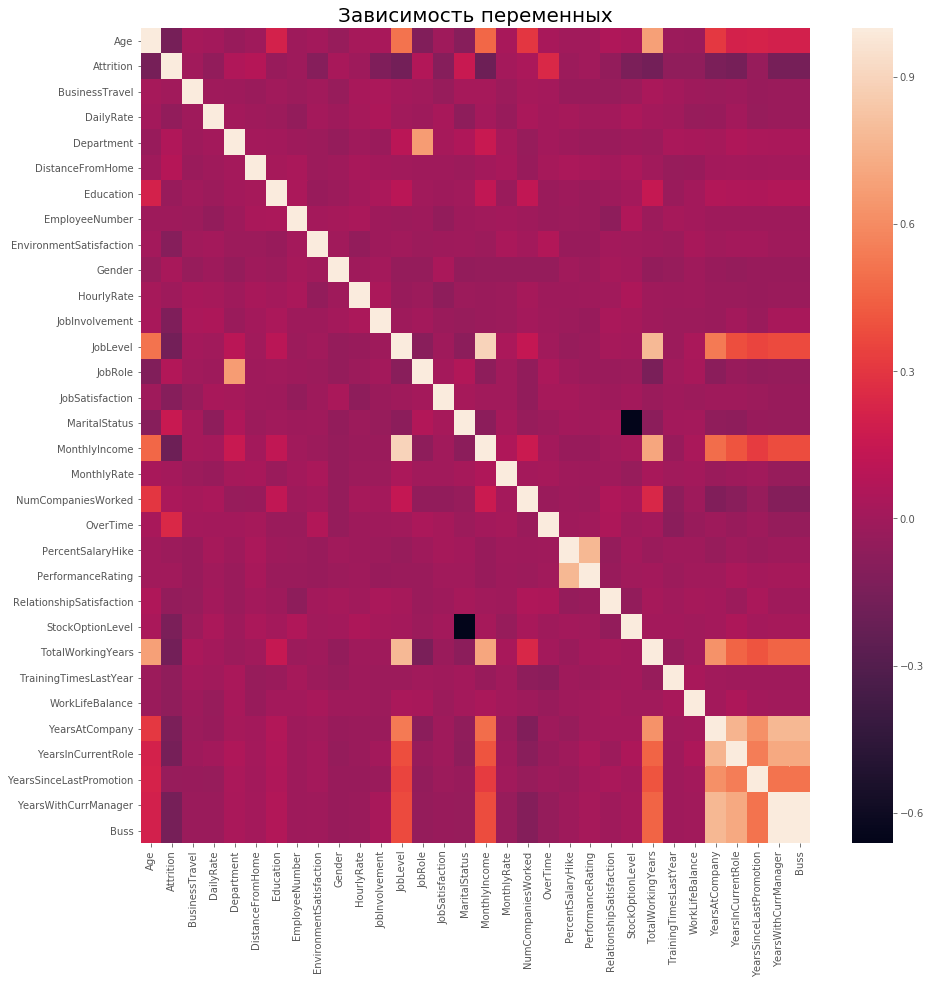

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (15, 15))
sns.heatmap(data = data.corr())
plt.title('Зависимость переменных', fontsize = 20)
plt.show()

In [105]:
correlations = data.corr()
corr_attririon = correlations.Attrition

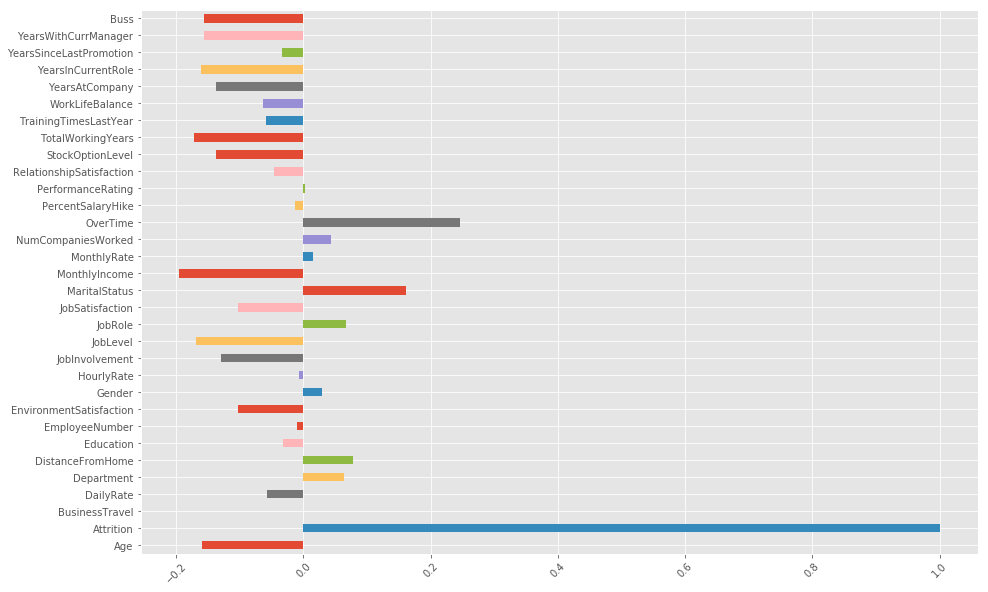

In [106]:
corr_attririon.plot(kind='barh', figsize=(15,10))
plt.xticks(rotation = 45)
plt.show()

Особо высоких коэффицентов корреляции нет, но, наверное, так и должно быть. В глаза сразу бросается переменная OverTime, отвечающая за переработки. Видно, что чем она больше, тем больше отток сотрудников. Переменная, отвечающая за возраст тоже значима, в этом случае, чем она меньше, тем отток больше. Это связано скорее всего с тем, что молодые люди более свободны и чаще меняют место работы, а не держаться за место, как более взрослые люди. Либо в компании есть проблемы с удержанием именно молодых сотрудников, стоит обратить на это внимание. Семейное положение также влияет на отток положительно, думаю просто потому, что люди, у которых есть семья и им нужно её обеспечивать боятся покидать рабочее место и уходят горазло реже. Ежемесячный доход также сильно влияет на отток, чем он меньше, тем больше отток. Стоит уделить внимание заработным платам.

В обучении моделей я не буду учитывать схожие признаки, вроде дохода в день, в час, если есть доход в месяц.

In [107]:
# создадим отдельные переменные для категориальных и непрерывных переменных
var_real = ['Age', 'DistanceFromHome', 'MonthlyIncome', 'NumCompaniesWorked', 'TotalWorkingYears',
            'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsWithCurrManager']
var_cat = ['EnvironmentSatisfaction', 'JobLevel', 'JobSatisfaction', 'StockOptionLevel', 'BusinessTravel', 
           'OverTime', 'Attrition', 'RelationshipSatisfaction', 'WorkLifeBalance', 'MaritalStatus']
# данные, на которых будет учиться модель:
data1 = data[var_real + var_cat]
data1.head()

,Age,DistanceFromHome,MonthlyIncome,NumCompaniesWorked,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,EnvironmentSatisfaction,JobLevel,JobSatisfaction,StockOptionLevel,BusinessTravel,OverTime,Attrition,RelationshipSatisfaction,WorkLifeBalance,MaritalStatus
0,23,0,809,8,8,0,6,4,5,1,1,3,0,2,1,1,0,0,2
1,31,7,682,1,10,3,10,7,7,2,1,1,1,1,0,0,3,2,1
2,19,1,62,6,7,3,0,0,0,3,0,2,0,2,1,1,1,2,2
3,15,2,313,1,8,3,8,7,0,3,0,2,0,1,1,0,2,2,1
4,9,1,399,9,6,3,2,2,2,0,0,1,1,2,0,0,3,2,1


In [108]:
# раздробьём выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

data1_train, data1_test = train_test_split(data1, test_size = 0.3, stratify = data1['Attrition']) 

In [109]:
# проскалируем непрерывные переменные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data1_train[var_real]) 

# скалируем в тренировочной выборке
data1_train_scale = scaler.transform(data1_train[var_real])
data1_train[var_real] = data1_train_scale

# скалируем в тестовой выборке
data1_test_scale = scaler.transform(data1_test[var_real])
data1_test[var_real] = data1_test_scale

C:\Users\maslo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\maslo\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\maslo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [110]:
# y - то, что мы хотим спрогнозировать, X - то, по чему мы это будем делать.

y_train = data1_train['Attrition']
y_test = data1_test['Attrition']

X_train = data1_train.drop(['Attrition'], axis=1).get_values()
X_test = data1_test.drop(['Attrition'], axis=1).get_values()

### Метод ближайших соседей

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV  # класс для перебора оптимальных параметров
# (например количества соседей, деревьев итд)
 
# попробуем найти оптимальное количество соседей
parameters = {'n_neighbors' : range(1, 100)}  
knc = KNeighborsClassifier()
clf = GridSearchCV(knc, parameters, scoring='roc_auc') # после долгих раздумий, я остановились именно на ROC auc,
clf.fit(X_train, y_train)                              # как на основной метрике качества, на которую я буду ориентироваться
clf.best_estimator_                                    # так как она не зависит от порога, а ещё, в отличае от PR auc,
                                                       # которую принятно считать лучше, ROC auc нечувствителен к дизбалансу
                                                       # классов, а именно это нам и важно, так как у нас именно такая ситуация

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=33, p=2,
           weights='uniform')

In [114]:
# 33 - оптимальное количество соседей в данной ситуации
knc = KNeighborsClassifier(n_neighbors=33)
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=33, p=2,
           weights='uniform')

In [115]:
# прогнозы
y_predicted = knc.predict(X_test)
y_predicted[:1000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [116]:
# теперь оценим нашу модель с помощью roс кривой

from sklearn.metrics import roc_auc_score, roc_curve

def roc_auc_pic(model, y_train, y_test, X_train, X_test):
    y_hat_train = model.predict_proba(X_train)[:,1]
    y_hat_test = model.predict_proba(X_test)[:,1]
    
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_hat_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_hat_test)
    roc_auc_train = roc_auc_score(y_train, y_hat_train)
    roc_auc_test = roc_auc_score(y_test, y_hat_test)

    matplotlib.rcParams['figure.figsize'] = (8, 8)
    plt.plot(fpr_train, tpr_train, label='Train ROC AUC {0}'.format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label='Test ROC AUC {0}'.format(roc_auc_test))
    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()  
    pass

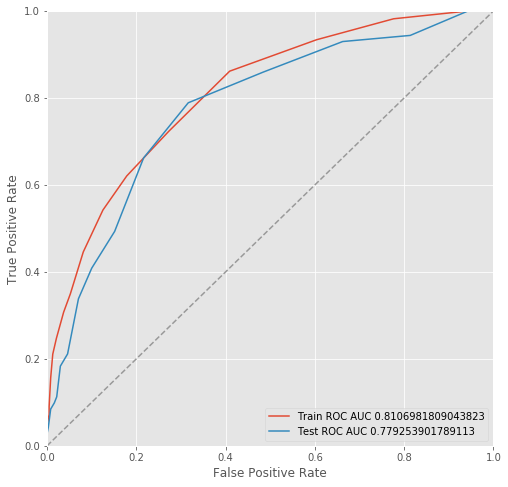

In [117]:
roc_auc_pic(knc, y_train, y_test, X_train, X_test)

Как можно заметить, у этой модели коэффициент ROC auc на тестовой выборке равен приблизительно 0,7. Норм. А что скажут метрики Pressision и Recall? 

In [118]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize=(5, 5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, fontsize=16)
    plt.yticks(tick_marks, classes, fontsize=16)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=30)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predicted label', fontsize=16)
    pass

             precision    recall  f1-score   support

          0       0.84      1.00      0.91       370
          1       0.75      0.04      0.08        71

avg / total       0.83      0.84      0.78       441



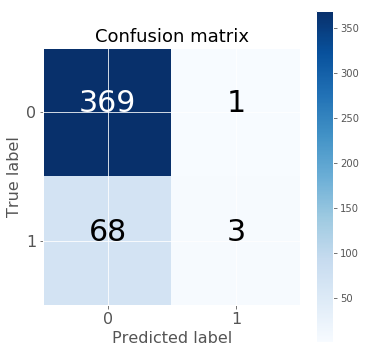

In [119]:
# возьмём порог 0.5
y_hat = knc.predict(X_test) > 0.5

cm = confusion_matrix(y_test, y_hat)
plot_confusion_matrix(cm, classes=['0', '1'])
report = classification_report(y_test, y_hat)
print(report)

Модель не предсказывает единичек, так как нули перетягивают всё внимание на себя. Это плохо.

### Случайный лес
Скорее всего, если мы будем обучать лишь одно дерево, то оно переобучится. Сразу сделаем лес


In [120]:
from sklearn.ensemble import RandomForestClassifier

# найдём оптимальное колиество деревьев и листьев
parameters = {
              'n_estimators': [10,20,50,70,100,120],           
              'min_samples_leaf': [1, 3, 5, 7, 10, 15],     
             }
rfc = RandomForestClassifier(random_state=42, class_weight = 'balanced') 
gcv = GridSearchCV(rfc, parameters, n_jobs= -1, cv = 5, scoring = 'roc_auc') 
gcv.fit(X_train, y_train)
gcv.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=3,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

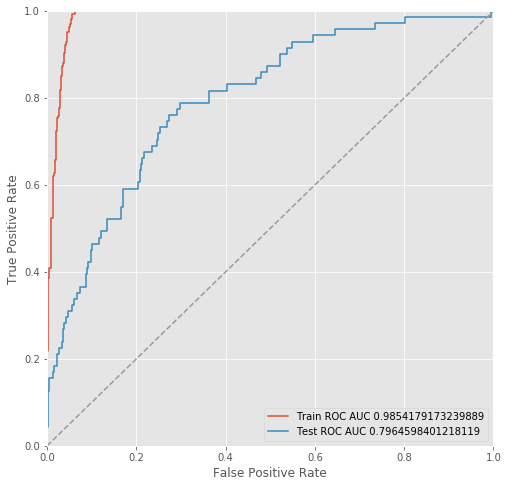

In [121]:
# оптимальное количество деревьев - 100, листьев - 3
rfc = RandomForestClassifier(n_estimators = 120, min_samples_leaf = 5, class_weight='balanced')
rfc.fit(X_train, y_train)
roc_auc_pic(rfc, y_train, y_test, X_train, X_test)

Прикольно. Коэффицент ROC auc на тестовой выборке у этой модели около 0,8. Вроде, это достаточно. А точность и полнота?

             precision    recall  f1-score   support

          0       0.88      0.93      0.91       370
          1       0.51      0.37      0.43        71

avg / total       0.82      0.84      0.83       441



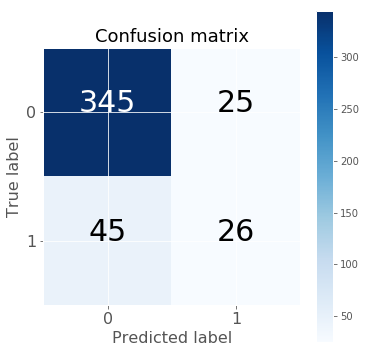

In [122]:
y_hat = gcv.predict(X_test) > 0.5

cm = confusion_matrix(y_test, y_hat)
plot_confusion_matrix(cm, classes=['0', '1'])
report = classification_report(y_test, y_hat)
print(report)

Здесь ситуация получше и единичек предсказывается больше. Коэффициенты точности здесь лучше, чем коэффициент полноты, но оба неплохие. Если компании будет важнее более точно предсказывать уход человека, а не удержать как можно больше - возможно, эта модель подойдёт лучше. Посмотрим, какие переменные оказались наиболее важными и минимизировали ошибку.

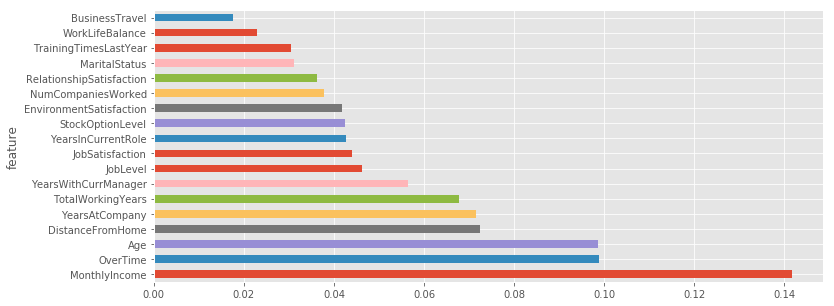

In [127]:
# посмотрим, какие переменные были для леса самыми важными и минимизировали ошибки

featureImportance = pd.DataFrame({"feature": data1.drop('Attrition',axis=1).columns, 
                                  "importance": rfc.feature_importances_})

featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('barh', figsize=(12,5))

А что будет, если попробовать логистическую регрессию??

## Логистическая регрессия

In [128]:
from sklearn.linear_model import LogisticRegression

# найду оптимальный параметр
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
lrs = GridSearchCV(LogisticRegression(penalty='l2', class_weight = 'balanced'), param_grid, scoring = 'roc_auc') 
lrs.fit(X_train, y_train)
print(lrs.best_estimator_)

LogisticRegression(C=10, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


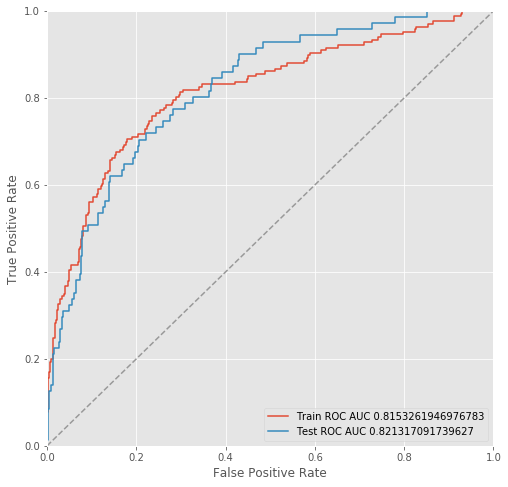

In [129]:
lrs = LogisticRegression(C = 10, class_weight = 'balanced')
lrs.fit(X_train, y_train)
roc_auc_pic(lrs, y_train, y_test, X_train, X_test)

Коэффициент ROC auc получился примерно 0.8. И модель почти не переобучилась. А чё там по точности и полноте?

             precision    recall  f1-score   support

          0       0.95      0.66      0.78       370
          1       0.31      0.80      0.45        71

avg / total       0.84      0.68      0.72       441



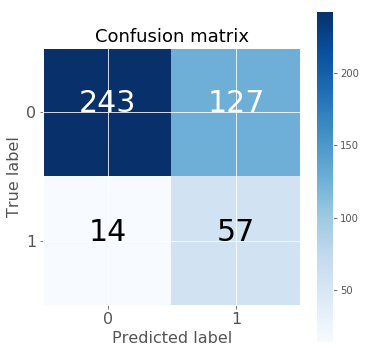

In [130]:
y_hat = lrs.predict(X_test) > 0.5
cm = confusion_matrix(y_test, y_hat)
plot_confusion_matrix(cm, classes=['0', '1'])
report = classification_report(y_test, y_hat)
print(report)

Получилось даже многовато единичек. Но результат всё равно хороший. Если компании будет важно удержать как можно больше сотрудников и не страшно, что каких-то ресурсов на это потратится больше, то эта модель подойдёт, так как ее полнота равна целых 80 процентов. Имеет смысл и у этой моделии посмотреть те факторы, которые были для неё наиболее важны.

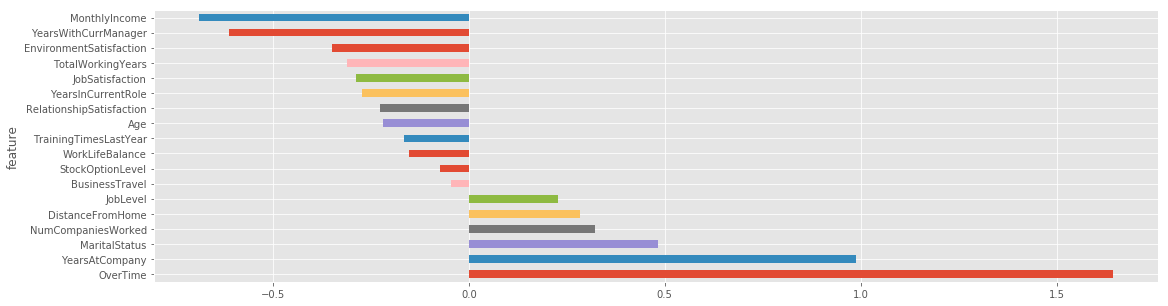

In [131]:
featureImportance = pd.DataFrame({"feature": data1.drop('Attrition',axis=1).columns, 
                                  "importance": lrs.coef_[0]})

plt.figure(figsize=(18,5))
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('barh')

## Отток людей в зависимости от профессии и отдела работы
Думаем, очевидно, что, как правило, человек решит уйти независимо от того, в каком отделе он работает. Ему просто не нравится что-то конкретное, например маленькая зарплата или постоянные переработки. Однако, если тенденция к уходу из какого-то отдела зачительно больше, чем из остальных, то проблему нужно поискать уже внутри отдела. С профессией проще. Скорее всего, если существует тенденция ухода людей определённой профессии, это значит, что в компании зарплата, возможности карьерного роста или что-то типа того для людей конкретно этих профессий не очень хорошие в сравнении с другими компаниями.

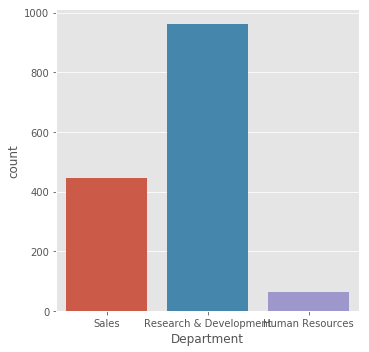

In [132]:
# посмотрим, есть ли большая разница в количестве человек, работающих в отделах
sns.catplot('Department', data = df, kind = 'count')

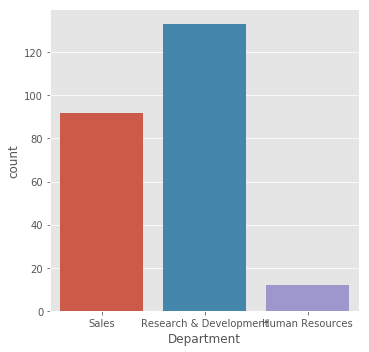

In [133]:
# а теперь посмотрим, где больше людей покинуло работу
attrition = df[(df.Attrition == 'Yes')]
sns.catplot('Department', data = attrition, kind = 'count')

Да уж, видно, что различие в оттоке отделов напрямую зависит от различия в количестве человек, работающих в самих отделах. Можно сделать вывод, что во всех отделах отток работников распределён практически равномерно. Хотя вот в отделе продаж всё же более выражена тенденция к уходу. Даже если разница была бы значительной, мы ведь обучаем модель для того, чтобы использовать её на практике в будущем и предсказывать вероятность ухода работников. Разве мы могли бы позволить машине считать, что какой-то отдел хуже и предсказывать, уйдёт человек или нет в зависимости от этого факта. Это было бы так, как будто мы согласны с тем, что некоторые отделы у нас такое себе, но никак не пытались бы исправить ситуацию. Однако, оказалось, что во всех отделах отток равномерен, а корреляция переменных, отвечающих за отделы, появлялась лишь из-за разницы в количестве работающих в отделе человек. Тем не менее, мы бы проверили, вдруг в каждом отделе причины ухода различаются. Возьмём две удачные модели, случаный лес и логистическую регресию, и попробуем посмотреть, как будет различаться значимость переменных по отделам.

In [135]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Buss
0,23,1,2,624,2,0,1,Life Sciences,0,1,0,64,2,1,7,3,2,809,19479,8,1,0,3,0,0,8,0,0,6,4,0,5,5
1,31,0,1,113,1,7,0,Life Sciences,1,2,1,31,1,1,6,1,1,682,24907,1,0,12,4,3,1,10,3,2,10,7,1,7,7
2,19,1,2,805,1,1,1,Other,2,3,1,62,1,0,2,2,2,62,2396,6,1,4,3,1,0,7,3,2,0,0,0,0,0
3,15,0,1,820,1,2,3,Life Sciences,3,3,0,26,2,0,6,2,1,313,23159,1,1,0,3,2,0,8,3,2,8,7,3,0,0
4,9,0,2,312,1,1,0,Medical,4,0,1,10,2,0,2,1,1,399,16632,9,0,1,3,3,1,6,3,2,2,2,2,2,2


In [162]:
# срежем данные в зависимости от отдела

data_sales = data[(data.Department == 2)]
data_sales = data_sales[var_real + var_cat]
data_research = data[(data.Department == 1)]
data_research = data_research[var_real + var_cat]
data_human = data[(data.Department == 3)]
data_human = data[var_real + var_cat]

In [141]:
# раздробьём выборку на тренировочную и тестовую для отдела продаж


data_sales_train, data_sales_test = train_test_split(data_sales, test_size = 0.3, stratify = data_sales['Attrition']) 

# проскалируем непрерывные переменные

scaler = StandardScaler()
scaler.fit(data_sales_train[var_real]) 

# скалируем в тренировочной выборке
data_sales_train_scale = scaler.transform(data_sales_train[var_real])
data_sales_train[var_real] = data_sales_train_scale

# скалируем в тестовой выборке
data_sales_test_scale = scaler.transform(data_sales_test[var_real])
data_sales_test[var_real] = data_sales_test_scale

y_train = data_sales_train['Attrition']
y_test = data_sales_test['Attrition']

X_train = data_sales_train.drop(['Attrition'], axis=1).get_values()
X_test = data_sales_test.drop(['Attrition'], axis=1).get_values()

C:\Users\maslo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
C:\Users\maslo\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\maslo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [142]:
# ищем оптимальные параметры для случайного леса
parameters = {
              'n_estimators': [10,20,50,70,100,120],           
              'min_samples_leaf': [1, 3, 5, 7, 10, 15],     
             }
rfc = RandomForestClassifier(random_state=42, class_weight = 'balanced') 
gcv = GridSearchCV(rfc, parameters, n_jobs= -1, cv = 5, scoring = 'roc_auc') 
gcv.fit(X_train, y_train)
print(gcv.best_estimator_)

#  ищем оптимальный параметр для логичтической регрессии
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
lrs = GridSearchCV(LogisticRegression(penalty='l2', class_weight = 'balanced'), param_grid, scoring = 'roc_auc')
lrs.fit(X_train, y_train)
print(lrs.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
LogisticRegression(C=1000, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


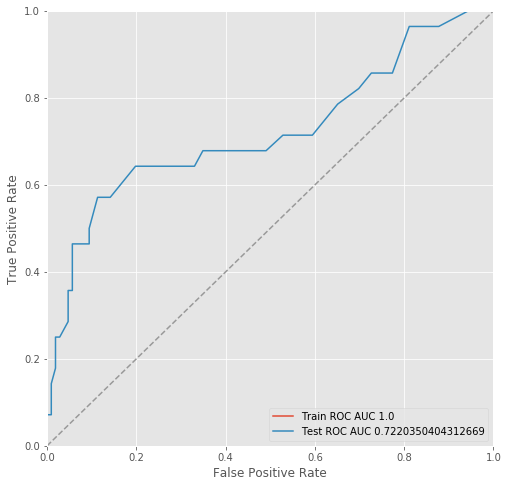

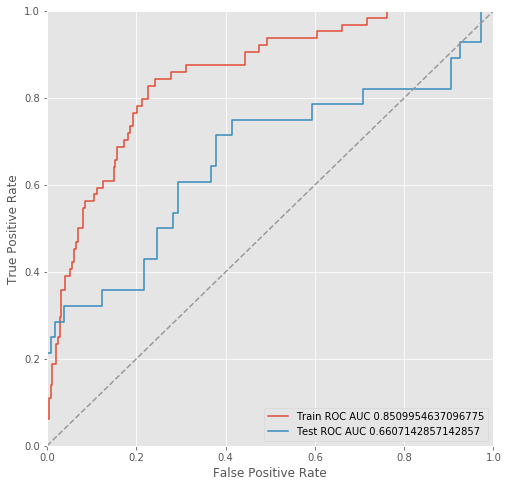

In [143]:
# случайный лес
rfs = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 1, class_weight = 'balanced')
rfs.fit(X_train, y_train)

# логистическая регрессия
lrs = LogisticRegression(C = 1000, class_weight = 'balanced')
lrs.fit(X_train, y_train)

# на всякий случай посмотрим коэффициент ROC auc
roc_auc_pic(rfs, y_train, y_test, X_train, X_test)
roc_auc_pic(lrs, y_train, y_test, X_train, X_test)

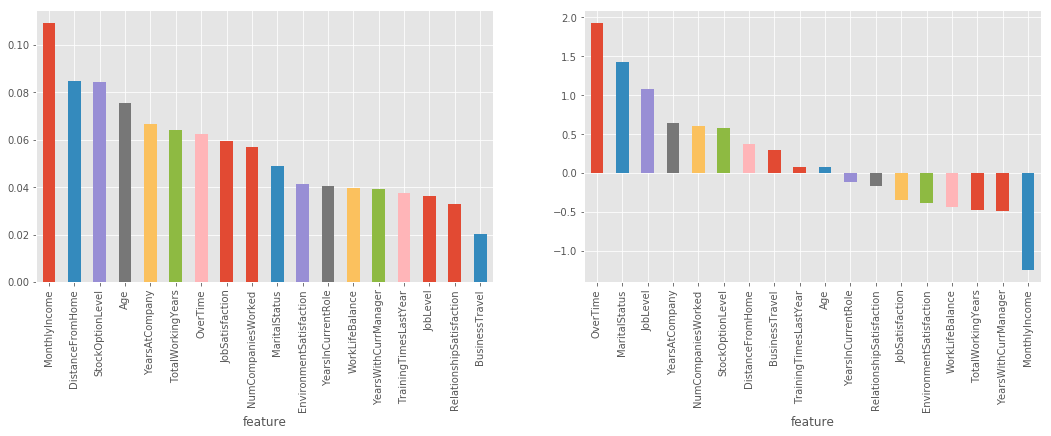

In [145]:
# посмотрим, что там в итоге вышло у отдела продаж
featureImportance = pd.DataFrame({"feature": data_sales.drop('Attrition',axis=1).columns, 
                                  "importance": rfs.feature_importances_})
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

featureImportance = pd.DataFrame({"feature": data_sales.drop('Attrition',axis=1).columns, 
                                  "importance": lrs.coef_[0]})
plt.subplot(1,2,2)
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

In [146]:
# теперь раздробьём выборку на тренировочную и тестовую для исследовательского отдела

from sklearn.model_selection import train_test_split

data_research_train, data_research_test = train_test_split(data_research, test_size = 0.3, stratify = data_research['Attrition']) 

# проскалирую непрерывные переменные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_research_train[var_real]) 

# скалирую в тренировочной выборке
data_research_train_scale = scaler.transform(data_research_train[var_real])
data_research_train[var_real] = data_research_train_scale

# скалирую в тестовой выборке
data_research_test_scale = scaler.transform(data_research_test[var_real])
data_research_test[var_real] = data_research_test_scale

y_train = data_research_train['Attrition']
y_test = data_research_test['Attrition']

X_train = data_research_train.drop(['Attrition'], axis=1).get_values()
X_test = data_research_test.drop(['Attrition'], axis=1).get_values()

C:\Users\maslo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\maslo\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\maslo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [147]:
# ищем оптимальные параметры для случайного леса
parameters = {
              'n_estimators': [10,20,50,70,100,120],           
              'min_samples_leaf': [1, 3, 5, 7, 10, 15],     
             }
rfc = RandomForestClassifier(random_state=42, class_weight = 'balanced') 
gcv = GridSearchCV(rfc, parameters, n_jobs= -1, cv = 5, scoring = 'roc_auc') 
gcv.fit(X_train, y_train)
print(gcv.best_estimator_)

#ищем оптимальные параметры для логичтической регрессии
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
lrs = GridSearchCV(LogisticRegression(penalty='l2', class_weight = 'balanced'), param_grid, scoring = 'roc_auc')
lrs.fit(X_train, y_train)
print(lrs.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


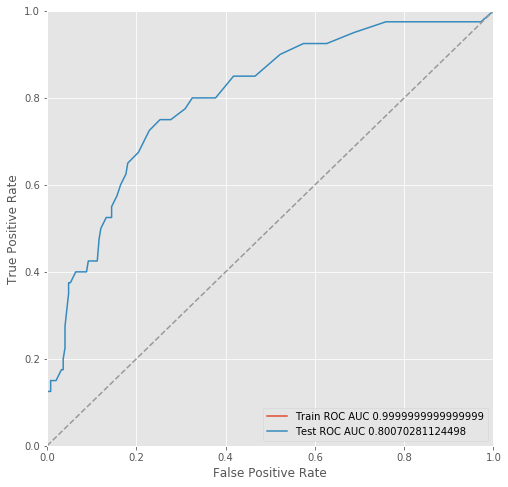

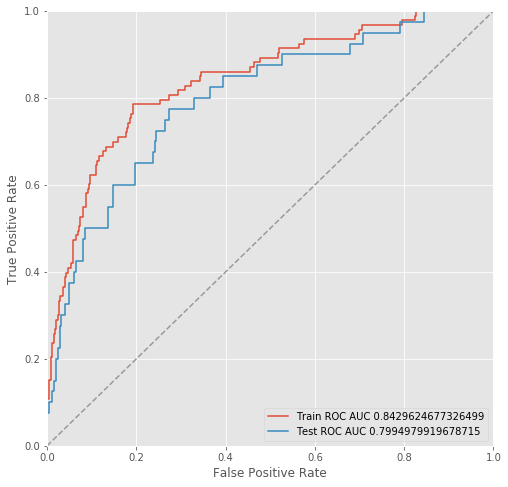

In [148]:
# случайный лес
rfs = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 1, class_weight = 'balanced')
rfs.fit(X_train, y_train)

# логистическая регрессия
lrs.fit(X_train, y_train)
lrs = LogisticRegression(C = 0.1, class_weight = 'balanced')
lrs.fit(X_train, y_train)

# на всякий случай посмотрим коэффициент ROC auc
roc_auc_pic(rfs, y_train, y_test, X_train, X_test)
roc_auc_pic(lrs, y_train, y_test, X_train, X_test)

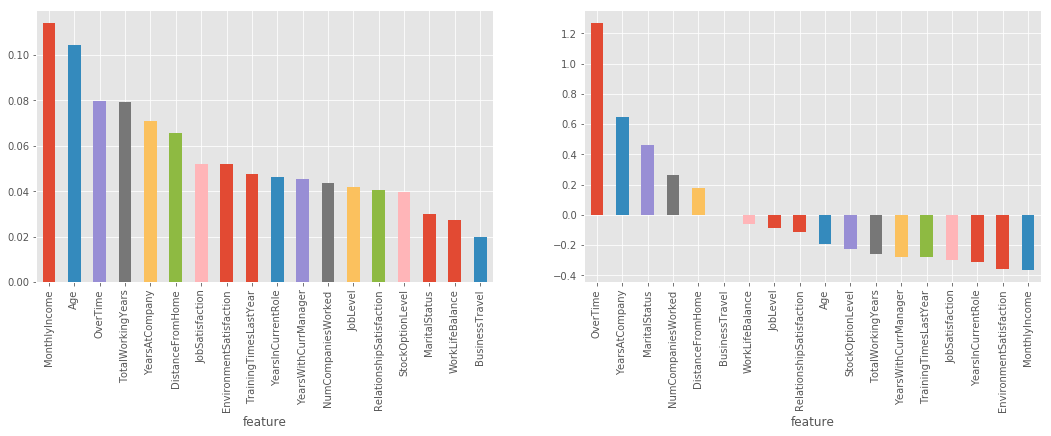

In [150]:
# посмотрим, что там в итоге вышло у отдела исследований
featureImportance = pd.DataFrame({"feature": data_research.drop('Attrition',axis=1).columns, 
                                  "importance": rfs.feature_importances_})
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

featureImportance = pd.DataFrame({"feature": data_research.drop('Attrition',axis=1).columns, 
                                  "importance": lrs.coef_[0]})
plt.subplot(1,2,2)
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

In [163]:
# ну и наконец, отдел кадров

from sklearn.model_selection import train_test_split

data_human_train, data_human_test = train_test_split(data_human, test_size = 0.3, stratify = data_human['Attrition']) 

# проскалируем непрерывные переменные
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data_human_train[var_real]) 

# скалируем в тренировочной выборке
data_human_train_scale = scaler.transform(data_human_train[var_real])
data_human_train[var_real] = data_human_train_scale

# скалируем в тестовой выборке
data_human_test_scale = scaler.transform(data_human_test[var_real])
data_human_test[var_real] = data_human_test_scale

y_train = data_human_train['Attrition']
y_test = data_human_test['Attrition']

X_train = data_human_train.drop(['Attrition'], axis=1).get_values()
X_test = data_human_test.drop(['Attrition'], axis=1).get_values()

C:\Users\maslo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\maslo\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
C:\Users\maslo\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [164]:
# ищем оптимальные параметры для случайного леса
parameters = {
              'n_estimators': [10,20,50,70,100,120],           
              'min_samples_leaf': [1, 3, 5, 7, 10, 15],     
             }
rfc = RandomForestClassifier(random_state=42, class_weight = 'balanced') 
gcv = GridSearchCV(rfc, parameters, n_jobs= -1, cv = 5, scoring = 'roc_auc') 
gcv.fit(X_train, y_train)
print(gcv.best_estimator_)

# ищем оптимальный параметр для логистической регрессии
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
lrs = GridSearchCV(LogisticRegression(penalty='l2', class_weight = 'balanced'), param_grid, scoring = 'roc_auc')
lrs.fit(X_train, y_train)
print(lrs.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=5,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)
LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


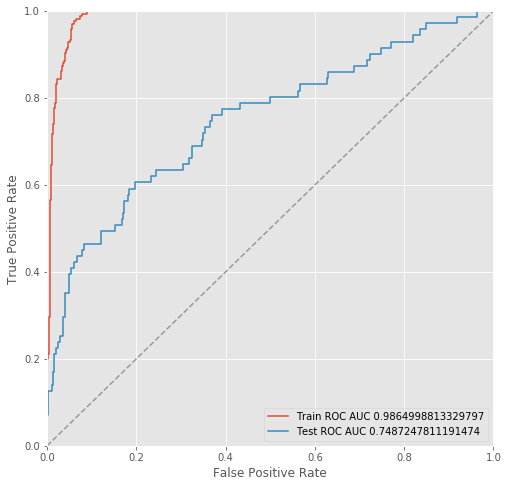

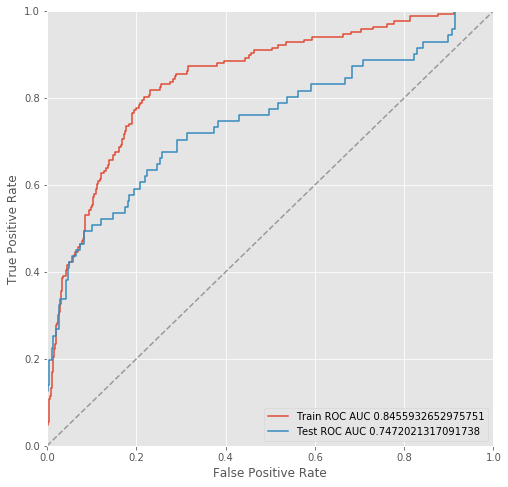

In [165]:
# случайный лес
rfs = RandomForestClassifier(n_estimators = 100, min_samples_leaf = 5, class_weight = 'balanced')
rfs.fit(X_train, y_train)

# логистическая регрессия
lrs = LogisticRegression(C = 0.1, class_weight = 'balanced')
lrs.fit(X_train, y_train)

# на всякий случай посмотрим коэффициент ROC auc
roc_auc_pic(rfs, y_train, y_test, X_train, X_test)
roc_auc_pic(lrs, y_train, y_test, X_train, X_test)

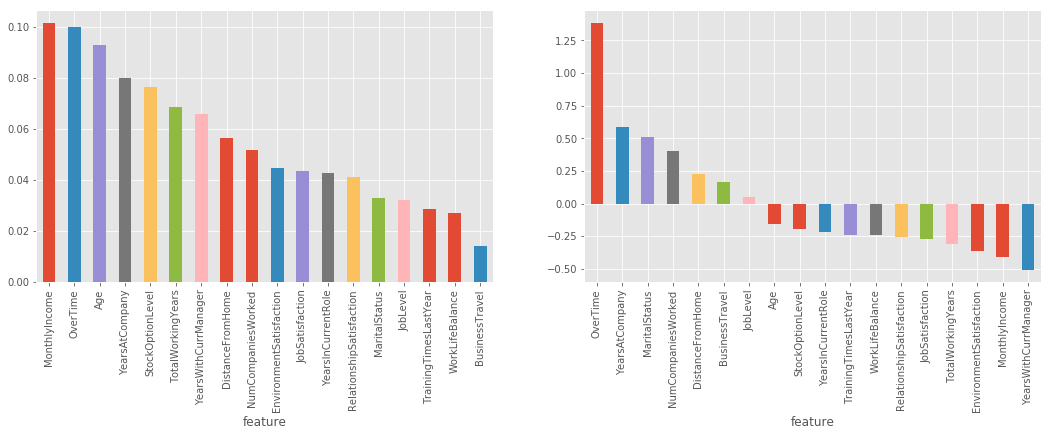

In [167]:
# важность переменных в отделе кадров
featureImportance = pd.DataFrame({"feature": data_human.drop('Attrition',axis=1).columns, 
                                  "importance": rfs.feature_importances_})
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

featureImportance = pd.DataFrame({"feature": data_human.drop('Attrition',axis=1).columns, 
                                  "importance": lrs.coef_[0]})
plt.subplot(1,2,2)
featureImportance.set_index('feature', inplace=True)
featureImportance.sort_values(["importance"], ascending=False, inplace=True)
featureImportance["importance"].plot('bar')

В целом, разница у отделов не такая большая, но она есть. 

Теперь посмотрим, не уходят ли люди каких-либо профессий чаще других

In [169]:
data = pd.read_csv(file)

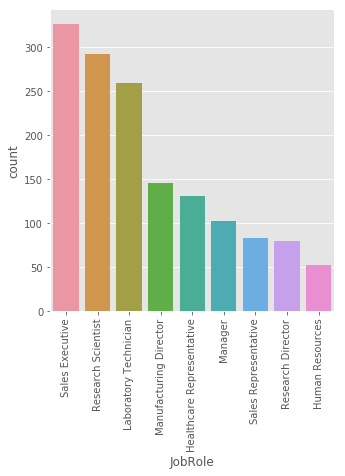

In [170]:
# вначале посмотрим на распределение профессий в целом
g = sns.catplot('JobRole', data = data, kind = 'count')
g.set_xticklabels(rotation=90)

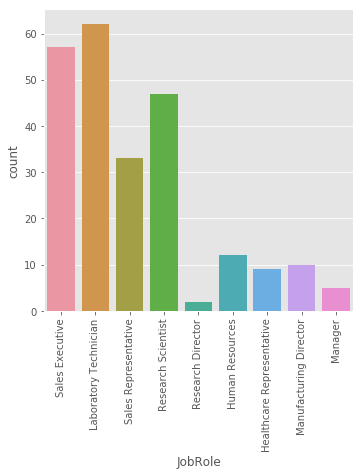

In [171]:
gr = sns.catplot('JobRole', data = attrition, kind = 'count')
gr.set_xticklabels(rotation=90)

А вот здесь уже есть о чём задуматься. Если повтыкать в графики и посравнивать, то можно прийти к выводу, что самое большое соотношение количества ушедших человек к количеству человек в отделе всего наблюдается среди трёх профессий: рабочие лабороторий (около 60/250 человек (0.24)), торговых представителей (около 30 из 80 человек(0.38)) и кадровиков (где-то 11 из 50 (0.22)). Для сравнения, у хэлзкэр 0.07, у менеджеров всего 0.05, а у директаров 0.03 и 0.06. Это всё приблизительно конечно, но разница очевидна. Нужно уделить внимание этим трём профессиям, особенно сэйлс репрезентив с оттоком равным 38%. Думaю нет смысла снова подключать машинное обучение, мы это уже делали для отделов. Результаты скорее всего получатся похожими на результаты отделов, соответсвующих этим профессиям. Возможно, стоит проанализировать, куда уходят эти работники и сравнить, чем хуже условия для этих профессий в данной компании по сравнению с другими. Но таких данных у меня нет, пусть компания там сама порешает

## Анализ полученных данных

### Общие рекомендации фирме
Если посмотреть на оба графика (важные переменные для случайного леса и важные переменные для логистической регрессии, то, отбрасывая какие-то сложно инторпретируемые результаты, а также те результаты, с которыми компания по сути ничего поделать не может (такой фактор, как семейное положение например), то можно выделить 5 важнейших переменных для моделей по данным о всей компании в целом:
1. Ежемесячный доход
2. Ненормированный рабочий день (переработки)
3. Возраст
4. Частые командировки
5. Годы работы под руководством одного и того же менеджера

На основе этих данных, можно дать следующие рекомендации фирме:
 Понятно, что многие сотрудники недовольны своим доходом: ежемесячным, а также почасовой, дневной и ежемесячной ставками. Очевидно, что руководству стоит пересмотреть условия оплаты труда сотрудников. Так как наибольшее влияние оказывает ежемесячный доход, включающий в себя разного рода доплаты и премии (фиксированные ставки влияют меньше), имеет смысл пересмотреть именно систему выплаты надбавок к основному доходу. Можно предположить, что сотрудники недостаточно мотивированы для продолжения работы в данной компании, так как различные достижения в работе не поощряются руководством. Возможно, действенной мерой будет введение премий за хорошо выполненную работу, а не одинаковое поощрение тех, кто работает с отдачей и без нее. Например, мы видим, что многие сотрудники уходят из-за ненормированного рабочего дня. Было бы неплохо (да и вообще логично и справедливо) поощрять премиями переработку. Также, можно было бы установить систему контроля за нормами рабочего дня (не допускать слишком сильных переработок). Возраст также оказывает большое влияние, чем моложе сотрудники, тем больше они уходят (это видно из корреляции, а также из логистической регрессии). Эту проблему можно было бы решить введением каких-либо специальных условий для молодых сотрудников. Но на самом деле, возраст - это не корень проблемы, просто молодые сотрудники более подвижны и свободны уйти с места работы из-за неустраивающих их факторов. Например, тот же уровень дохода и прочее. Постоянные командировки очевидно являются неприятным фактом для многих людей. Думаем, компании необходимо распределять график командировок более равномерно между всеми сотрудниками, а при возможности, постараться их сократить. Годы работы под руководством одного и того же менеджера также оказывают определённое влияние на отток. Виодно, что чем дольше люди работают с одним и тем же менеджером, тем реже они покидают работу. Можно объяснить это тем, что менеджер - важное звено колектива, на него возложено множество задач по поднятию мотивации сотрудников, организации более комфортного рабочего процесса и отслеживание взаимоотношений в коллективе. Рабочие, вероятно, привязываются к менеджерам и всему колективу, с которым рабают долгие годы и имеют меньшее желание покинуть работу. А когда менеджер меняется часто, он толком не успевает построить благоприятные взаимоотношения в колективе, из-за чего этот самый колектив менее сплочён. Люди в такой ситуации гораздо легче покидают работу.

### Рекомендации фирме в зависимости от отдела
На самом деле, разница в отделах оказалась незначительной. Но тем не менее, она есть. Даже одна отличающаяся переменная может о многом нам сказать. Так, например, в отделе продаж, очень значимым фактором оказался, внезапно, уровень владения сотрудником акциями компании. Чем он выше, тем реже сотрудники отдела продаж покидают нас. В связи с этим, стоит порекомендвать компании распространять тенденцию вовлечения простых сотрудников во владение акциями в отделе продаж. Очевидно, что когда человек чувствует себя пречастным к делам компании, он больше доволен своей работой.
В исследовательском отделе молодые сотрудники уходят немного почаще, чем в других. Компании стоит поработать над предоставлениям молодым людям больших возможностей для проявления себя, реализации потенциала и карьерного роста. Молодые люди не держаться за место, как старшее поколение, они желают развиваться и не останутся в компании, где для этого существует немного возможностей. В отделе кадров переменная, отвечающая за количество лет, отработанных сотрудником в компани, имеет большее влияние, чем в остальных отделах. Чем меньше человек проработал в компании, тем больше вероятность его ухода. Это связано с тем, что работники надолго не задерживаются. Можно предположить, что это, опять же, связано с отсутствием возможностей карьерного роста в отделе кадров. Компании стоит об этом задуматься.

### Отток работников в зависимости от профессии
я посчитала интересным проанализировать также и это. Выяснилось, что не зря. Оказалось, что отток торговых представителей составляет целых 38%, что мы считаем достаточно значимой величиной. Целых 24% работников лабороторий и 22% кадровиков также покинули нас. Можно сделать вывод, что именно этим профессиям стоит уделить внимание. Компании стоит проанализировать, куда уходят эти люди и сравнить возможности, доход и т.д. в конкурентныых фирмах со своими. Думаю, они найдут там что-то интересное, а у меня этих данных, увы, нет.У остальных профессий отток значительно поменьше. 
